<!-- Data which for implementing ML and Deep learning:https://archive.ics.uci.edu/ml/index.php -->

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# tensorflow library to perform deep learning
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

In [ ]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']

In [ ]:
raw_data=pd.read_csv(url,names=column_names,na_values='?',sep=' ',skipinitialspace=True,comment="\t")

In [ ]:
dataset=raw_data.copy()

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
dataset.shape

(398, 8)

In [ ]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


Cleaning data

Checking Null values

In [ ]:
dataset.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset=dataset.dropna()


In [ ]:
dataset.shape

(392, 8)

In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [ ]:
dataset['Origin'].unique()

array([1, 3, 2])

In [ ]:
dataset['Origin'].value_counts()

1    245
3     79
2     68
Name: Origin, dtype: int64

In [ ]:
dataset['Origin'].sum()

618

In [ ]:
dataset.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
dataset['Origin']=dataset['Origin'].map({1:"USA",2:"Europe",3:"Japan"})

In [ ]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [ ]:
dataset.loc[50:55,:]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
50,28.0,4,116.0,90.0,2123.0,14.0,71,Europe
51,30.0,4,79.0,70.0,2074.0,19.5,71,Europe
52,30.0,4,88.0,76.0,2065.0,14.5,71,Europe
53,31.0,4,71.0,65.0,1773.0,19.0,71,Japan
54,35.0,4,72.0,69.0,1613.0,18.0,71,Japan
55,27.0,4,97.0,60.0,1834.0,19.0,71,Europe


In [ ]:
dataset=pd.get_dummies(dataset,columns=['Origin'],prefix='',prefix_sep='')

In [ ]:
dataset.loc[50:55,:]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
50,28.0,4,116.0,90.0,2123.0,14.0,71,1,0,0
51,30.0,4,79.0,70.0,2074.0,19.5,71,1,0,0
52,30.0,4,88.0,76.0,2065.0,14.5,71,1,0,0
53,31.0,4,71.0,65.0,1773.0,19.0,71,0,1,0
54,35.0,4,72.0,69.0,1613.0,18.0,71,0,1,0
55,27.0,4,97.0,60.0,1834.0,19.0,71,1,0,0


Split into train and test

In [ ]:
train_dataset=dataset.sample(frac=0.8,random_state=0)

In [ ]:
test_dataset=dataset.drop(train_dataset.index)

In [ ]:
train_dataset.shape

(314, 10)

In [ ]:
test_dataset.shape

(78, 10)

if we have large dataset than we it arise issues  during traing so we have to normalize those data.

**check overall stats**

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


If high  data like 104 and 843 than  we have to convert data into normalize data by using x-mu/std. where mean=0/std=1

In [ ]:
train_features=train_dataset.copy()

In [ ]:
train_features.head(1)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,28.0,4,90.0,75.0,2125.0,14.5,74,0,0,1


In [ ]:
train_labels=train_features.pop('MPG')

In [ ]:
train_labels.head(1)

146    28.0
Name: MPG, dtype: float64

In [ ]:
train_features.head(1)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1


In [ ]:
test_features=test_dataset.copy()
test_labels=test_features.pop('MPG')

Normalization

In [ ]:
train_dataset.describe().transpose()[["mean","std"]]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [ ]:
normalizer=tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(train_features))#it helps the normalization layer to learn value of mean and std

In [ ]:
normalizer.mean.numpy()
print(""*10)
print(normalizer.variance.numpy())


[[2.8800766e+00 1.0850413e+04 1.4466993e+03 7.0989688e+05 7.7550268e+00
  1.3467321e+01 1.4653738e-01 1.5846483e-01 2.3457341e-01]]


In [ ]:
train_features[:1]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,0,1


In [ ]:
first=train_features[:1]
normalized_first=normalizer(first).numpy()

In [ ]:
print("original: ",first.values)
print("Normalized: ",normalized_first)

original:  [[4.000e+00 9.000e+01 7.500e+01 2.125e+03 1.450e+01 7.400e+01 0.000e+00
  0.000e+00 1.000e+00]]
Normalized:  [[-0.8707355  -1.0110706  -0.7853044  -1.0269394  -0.38036528 -0.51722217
  -0.46589085 -0.49601588  0.7759128 ]]


## **Linear regression with one variable**

Begin with a single-variable linear regression to predict 'MPG' from 'Horsepower'.

Training a model with tf.keras typically starts by defining the model architecture. Use a tf.keras.Sequential model, which represents a sequence of steps.

**Sequential groups a linear stack of layers into a tf.keras.Model.**


There are two steps in your single-variable linear regression model:

- Normalize the 'Horsepower' input features using the 
tf.keras.layers.Normalization preprocessing layer.

- Apply a linear transformation () to produce 1 output using a linear layer (tf.keras.layers.Dense).

The number of inputs can either be set by the input_shape argument, or automatically when the model is run for the first time.

In [ ]:
horsepower = np.array(train_features['Horsepower'])

In [ ]:
horsepower_normalizer = layers.Normalization(input_shape=[1,],axis=None)

In [ ]:
horsepower_normalizer.adapt(horsepower)

In [ ]:
horsepower_model = tf.keras.Sequential([
                                        horsepower_normalizer,
                                        layers.Dense(units=1)
])

In [ ]:
horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


Once the model is built, configure the training procedure using the Keras Model.compile method. The most important arguments to compile are the loss and the optimizer, since these define what will be optimized (mean_absolute_error) and how (using the tf.keras.optimizers.Adam)


## **How many times is backprop used in epoch?**

It depends on the type of gradient descent or respectively your batch size: One epoch means that your neural net (NN) has applied the forward pass on all examples of your training data, i.e. it has "seen" all training data. Now to do so you have at least two options (let n be the number of samples in your training data):

- You can either run backprop after each forward pass of an example and update your weights accordingly. This is usually implemented as stochastic gradient descent (SGD), has a batch size of 1 and means you run backprop n times per epoch.

- Alternatively, you can first run the forward pass for all your training data and then run backprop and update your weights accordingly. This is called batch gradient descent, has a batch size of n and means you run backprop once per epoch.

In [ ]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

[link text](https://)Use Keras Model.fit to execute the training for 100 epochs:

In [ ]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 3.91 s, sys: 203 ms, total: 4.12 s
Wall time: 5.63 s


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.812139,4.144682,95
96,3.807076,4.181307,96
97,3.804811,4.193285,97
98,3.802879,4.191150,98
99,3.804167,4.179858,99


In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
def plot_history(history):
  plt.plot(history.history['loss'],label='training loss')
  plt.plot(history.history['val_loss'],label='validation loss')
  plt.ylim([0,10])
  plt.xlabel("Epochs")
  plt.ylabel("losses")
  plt.grid(True)
  plt.legend()

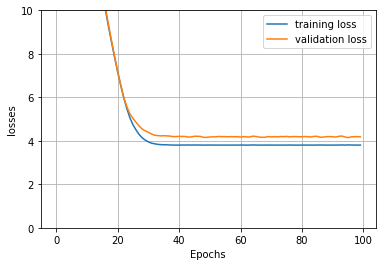

In [ ]:
plot_history(history)

## **Regression with a deep neural network (DNN)**

The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

- The normalization layer, as before (with horsepower_normalizer for a single-input model and normalizer for a multiple-input model).
- Two hidden, non-linear, Dense layers with the ReLU (relu) activation function nonlinearity.
- A linear Dense single-output layer.



In [ ]:
def build_compile_model(norm):
  model = keras.Sequential([
                            norm,
                            layers.Dense(64,activation='relu'),
                            layers.Dense(64,activation='relu'),
                            layers.Dense(1)
  ])
  model.compile(loss='mean_absolute_error',optimizer = tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
dnn_model = build_compile_model(normalizer)

In [ ]:
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 64)                640       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [ ]:
train_features.shape

(314, 9)

Description of above model summary:

- there are 9 features so, output shape of Ist input layer = 9 
- first hidden layer, contains 64 neurons which produces 64 outputs, number of parameter = number of weight * number of neuron + number of neuron(for bias),thus,
param = 64 * 64+64 = 640
- second hiiden layer also contains 64 neurons and hence 64 outputs, 
param = 64 * 64 +64 = 4160
- The third hidden layer is output layer, it contains single neuron for single(1) output,
param = 64*1+1 = 65


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    epochs=100
)

Epoch 1/100
8/8 [==============================] - 1s 25ms/step - loss: 22.9420 - val_loss: 22.9724
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 22.2181 - val_loss: 22.1331
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 21.4189 - val_loss: 21.1673
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 20.4448 - val_loss: 19.9453
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 19.2150 - val_loss: 18.3304
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 17.5590 - val_loss: 16.1932
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 15.4140 - val_loss: 13.6117
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 12.9314 - val_loss: 11.0903
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 10.3440 - val_loss: 8.9347
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 7.7731 - val_loss: 6.9960
Epoch 11/10

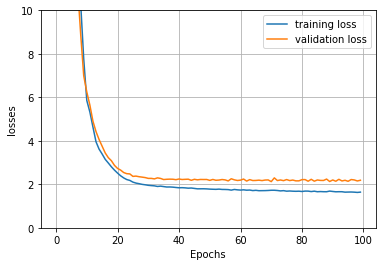

In [ ]:
plot_history(history)

In [ ]:
test_prediction = dnn_model.predict(test_features).flatten()

In [ ]:
test_prediction

array([15.510597 , 11.282557 , 11.17057  , 24.991539 , 20.58683  ,
       12.929062 , 13.470823 , 12.63921  , 19.180374 , 31.518507 ,
       24.505135 , 26.200064 , 15.018721 , 25.992617 , 12.890493 ,
       14.670971 , 14.974302 , 13.340412 , 17.988018 , 12.888252 ,
       14.0648775, 25.954567 , 19.648952 , 20.884386 , 30.535275 ,
       23.771515 , 16.57855  , 23.392378 , 17.400679 , 18.857006 ,
       28.190231 , 21.356663 , 18.53854  , 21.053335 , 26.392254 ,
       16.611202 , 18.877495 , 30.847073 , 30.132381 , 18.016884 ,
       30.747234 , 28.940968 , 16.117275 , 36.333637 , 34.72807  ,
       35.173447 , 20.53624  , 21.75408  , 19.985867 , 25.892094 ,
       30.908638 , 16.918922 , 31.95102  , 18.040306 , 17.5385   ,
       17.31203  , 32.89877  , 34.69929  , 22.747883 , 24.922428 ,
       38.549217 , 32.653675 , 27.17786  , 26.67783  , 32.02895  ,
       38.93     , 36.277744 , 35.22412  , 33.00823  , 30.417784 ,
       22.62667  , 22.477695 , 29.652384 , 29.940147 , 35.1492

In [ ]:
test_labels

9      15.0
25     10.0
28      9.0
31     25.0
33     19.0
       ... 
369    34.0
375    36.0
382    34.0
384    32.0
396    28.0
Name: MPG, Length: 78, dtype: float64

In [ ]:
len(normalizer.mean.numpy())[0]

TypeError: ignored

In [ ]:
normalizer.variance.numpy()[0]

In [ ]:
model=keras.Sequential([
                        normalizer,
                        layers.Dense(64,activation='relu'),
                        layers.Dense(64,activation='relu'),
                        layers.Dense(1)
])

In [ ]:
model.compile(loss='mean_absolute_error',optimizer = tf.keras.optimizers.Adam(0.001))

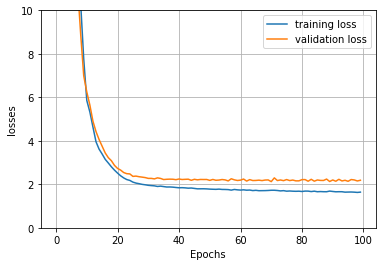

In [ ]:
plot_history(history)